<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week11_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 6**

Agus Prayogi (05 | 2141720025)

Diah Putri Nofianti (12 | 2141720054)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK/Week11'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
from skimage.feature import match_template

## Template Matching

Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

Dengan library OpenCv:

`cv.matchTemplate()` dengan parameter:

- **Image** => citra input
- **templ** => template yang dicari, tidak boleh lebih besar dari ukuran citra input
- **method** => metode dari template matching



In [9]:
objectPath = f'{path}/Object Detection'

img = cv.imread(f'{objectPath}/cats_and_bunnies.jpg')
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
assert imgGray is not None, "File tidak ditemukan, pada lokasi os.path.exists()"

template = cv.imread(f'{objectPath}/cat2_templatejpg.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "File tidak ditemukan, pada lokasi os.path.exists()"
# template = cv.cvtColor(template, cv.COLOR_BGR2RGB)
w, h = template.shape[::-1]

In [10]:
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

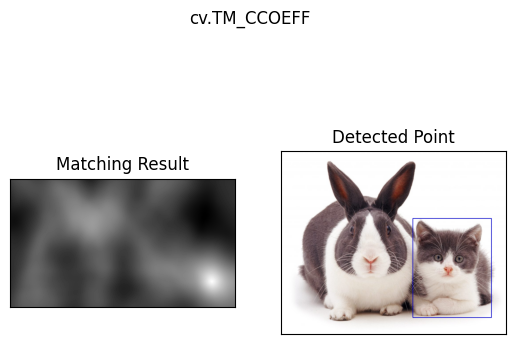

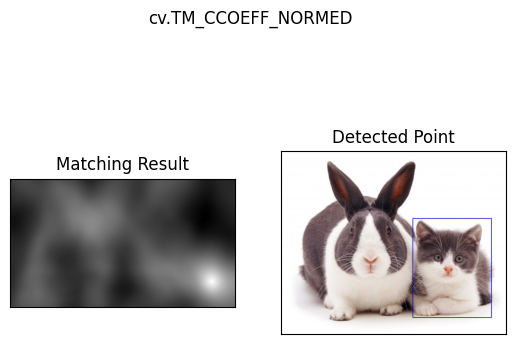

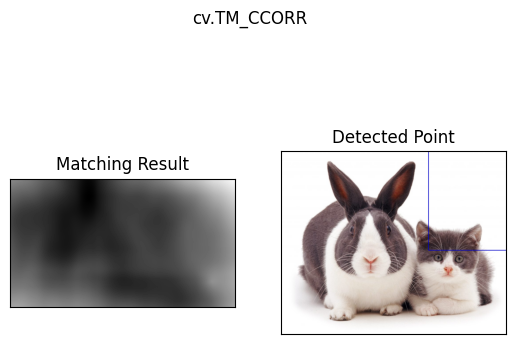

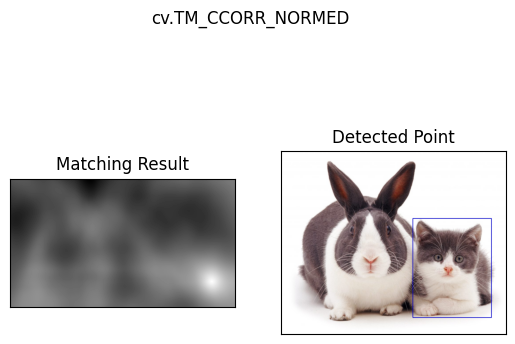

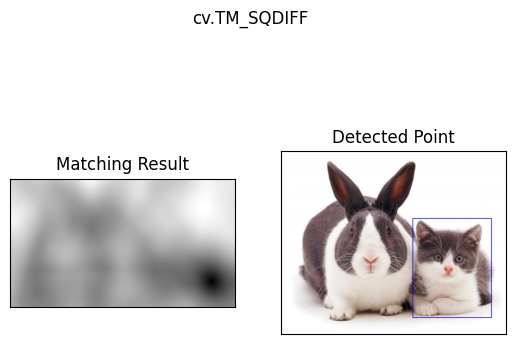

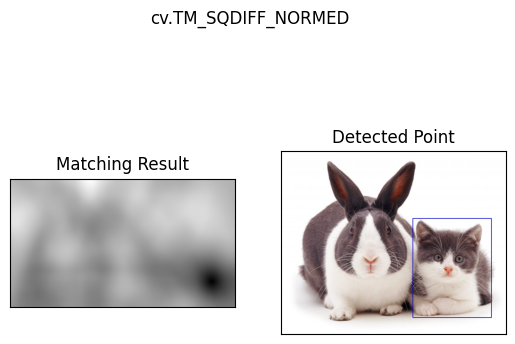

In [11]:
for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(imgGray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img2,top_left, bottom_right, 200, 2)
    plt.subplot(121),plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## Tanpa Library
Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

In [153]:
# Baca gambar masukan dan templat
input_image = Image.open(f"{objectPath}/bahrain.jpg")
assert input_image is not None, "File tidak ditemukan, pada lokasi os.path.exists()"
template_image = Image.open(f"{objectPath}/bahrain-template.jpg")
assert template_image is not None, print(f"File tidak ditemukan, pada lokasi {os.path.exists()}")

img = np.array(input_image.convert('L'))  # Konversi ke citra grayscale
template = np.array(template_image.convert('L'))

In [152]:
# Tentukan ambang batas dan variasi rotasi
threshold = 0.45

# Lakukan template matching dengan variasi rotasi
result = match_template(img, template)
locations = np.where(result >= threshold)

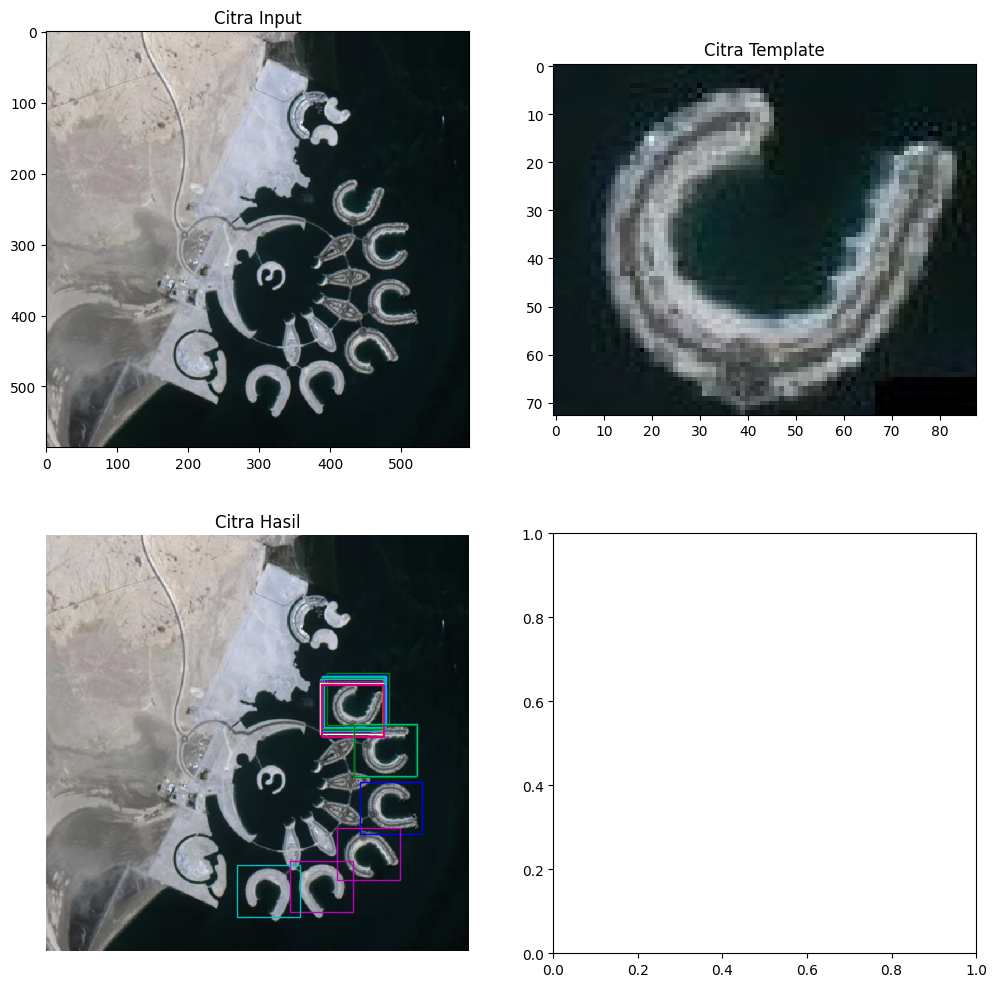

In [165]:
# Tampilkan hasil dengan kotak di sekitar objek yang terdeteksi
from random import randint
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))
axarr[0][0].imshow(input_image)
axarr[0][0].set_title("Citra Input")
axarr[0][1].imshow(template_image)
axarr[0][1].set_title("Citra Template")
axarr[1][0].set_title("Citra Hasil")
axarr[1][0].imshow(input_image)
axarr[1][0].set_axis_off()

height, width = template.shape
colors = ['r', 'g', 'b', 'c', 'm', 'w']

his_loc = result.shape
tot = 0
for loc in zip(*locations[::-1]):
  totHis = his_loc[0] - loc[0]
  his_loc = loc
  randC = randint(0, (len(colors)-1))
  # bersih gambar noise
  if totHis > 5:
    if tot != totHis:
      tot = totHis
      rect = plt.Rectangle(loc, width, height, edgecolor=colors[randC], facecolor='none', linewidth=1)
      axarr[1][0].add_patch(rect)

plt.show()

Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg.